     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
The results of our simulated circuit are: 
{'000': 508, '111': 492}


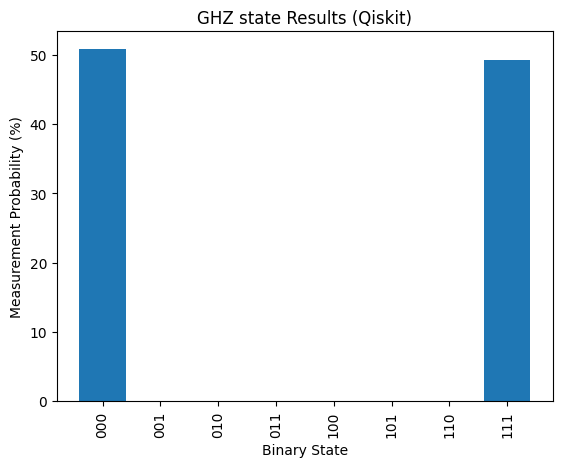

In [4]:
# =======================
# Importing the libraries
# =======================

# Core library from "quantumgateway" that lets us define circuits and gates 
from quantumgateway.quantum_circuit import QuantumCircuit, QuantumGate

# Translators: these take our abstract circuit and convert it into code 
# for specific frameworks (Qiskit, Braket, Cirq, PennyLane, PyQuil).
from quantumgateway.quantum_translator.braket_translator import BraketTranslator
from quantumgateway.quantum_translator.cirq_translator import CirqTranslator
from quantumgateway.quantum_translator.qiskit_translator import QiskitTranslator
from quantumgateway.quantum_translator.pennylane_translator import PennyLaneTranslator
from quantumgateway.quantum_translator.pyquil_translator import PyQuilTranslator

# Main functions: used to translate and simulate circuits regardless of framework
from quantumgateway.main import translate_to_framework, simulate_circuit

# Standard Python math library
import math

# =======================================
# Building a GHZ state quantum circuit
# =======================================
# A GHZ state is an entangled state for 3 qubits with the form  (|000⟩ + |111⟩) / √2

# We define our quantum circuit with three qubits and three bits to build the GHZ state
qc = QuantumCircuit(3, 3)

# Step 1: Apply a Hadamard gate (H) to qubit 0
# This creates superposition: (|0⟩ + |1⟩) / √2
qc.add_gate(QuantumGate("H", [0]))
# Step 2: Apply a CNOT with control = qubit 0, target = qubit 1
# This entangles qubit 1 with qubit 0
qc.add_gate(QuantumGate("CNOT", [0, 1]))
# Step 3: Apply another CNOT with control = qubit 1, target = qubit 2
# This entangles qubit 2 as well, producing the GHZ state
qc.add_gate(QuantumGate("CNOT", [1, 2]))
# Step 4: Measure all qubits and store results in classical bits
qc.add_gate(QuantumGate("MEASURE", [0, 0]))
qc.add_gate(QuantumGate("MEASURE", [1, 1]))
qc.add_gate(QuantumGate("MEASURE", [2, 2]))

# =======================================
# Translating the circuit to a framework
# =======================================

# Here we choose the framework we want to use (qiskit, cirq, pyquil, pennylane or amazonbraket)
# By default, we select Qiskit
selected_framework = 'qiskit'  
# Translate the circuit from "quantumgateway" to the chosen framework
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

# =======================================
# Circuit Simulation
# =======================================

# For plotting histograms
import matplotlib.pyplot as plt

# Simulate the circuit execution in the chosen framework
print("The results of our simulated circuit are: ")
# Returns a dictionary of measurement outcomes and counts (e.g., {"000": 512, "111": 512})
counts = simulate_circuit(qc, selected_framework)
print(counts)

# =======================================
# Post-processing and visualization
# =======================================

# Total number of shots
total_shots = sum(counts.values())
# Convert counts into percentages to better visualize probabilities
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Define all possible 3-qubit states (000, 001, 010, ..., 111) to show on the histogram
all_states = [format(i, '03b') for i in range(2**3)]

# Create a bar plot showing the probabilities
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')   # X-axis label
plt.ylabel('Measurement Probability (%)') # Y-axis label
plt.title('GHZ state Results (Qiskit)')   # Title of the plot
plt.xticks(rotation='vertical')  # Rotate x-axis labels
# Show the histogram
plt.show()

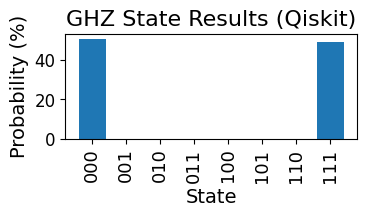

In [21]:
# and the following code is to save the image from the histogram

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Define all possible 3-qubit states (000, 001, 010, ..., 111) to show on the histogram
all_states = [format(i, '03b') for i in range(2**3)]

# Create a narrower and taller figure
plt.figure(figsize=(3.5, 2))  # width=6, height=4 (adjust if needed)

# Create the bar plot
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])

# Labels with larger fonts
plt.xlabel('State', fontsize=14)    
plt.ylabel('Probability (%)', fontsize=14)
plt.title('GHZ State Results (Qiskit)', fontsize=16)

# More readable ticks
plt.xticks(rotation='vertical',fontsize=13)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Reduce whitespace at the bottom
#plt.subplots_adjust(bottom=0.1)  # ajusta este valor según lo necesario
# Remove extra white space
plt.tight_layout(pad=0.1)

# Save adjusted image
plt.savefig("Fig.eps",dpi=300, bbox_inches='tight', pad_inches=0.05)

# Show the histogram
plt.show()

0: ───H───@───M('result0')──────────────────
          │
1: ───────X───@──────────────M('result1')───
              │
2: ───────────X──────────────M('result2')───
The results of our simulated circuit are: 
{'000': 496, '111': 504}


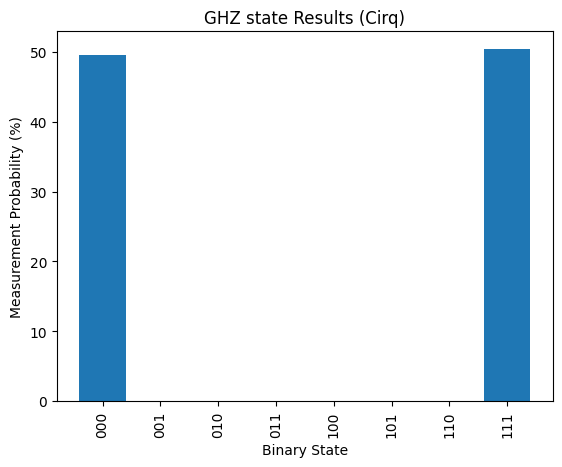

In [2]:
# We can proceed to see how the quantum circuit looks like in cirq's PyQuil 

selected_framework = 'cirq' 
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

# Finally, we simulate the circuit
import matplotlib.pyplot as plt

print("The results of our simulated circuit are: ")
counts = simulate_circuit(qc, selected_framework)
print(counts)

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '03b') for i in range(2**3)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (Cirq)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

DECLARE ro BIT[3]
H 0
CNOT 0 1
CNOT 1 2
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]

The results of our simulated circuit are: 
{'000': 496, '111': 504}


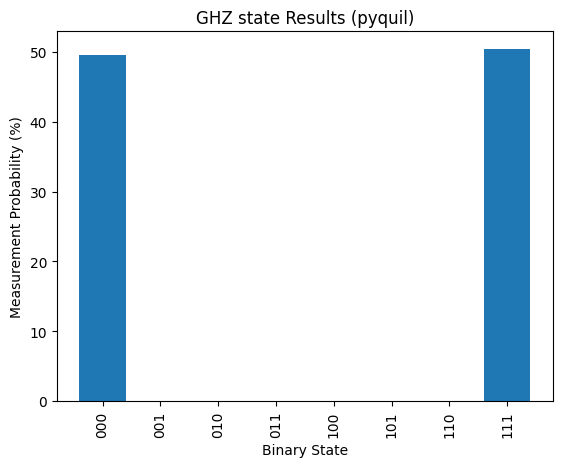

In [3]:
# we can proceed to see how the quantum circuit looks like in Rigetti's PyQuil 
selected_framework = 'pyquil' # Change this to the desired framework
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

print("The results of our simulated circuit are: ")
print(counts)

import matplotlib.pyplot as plt

total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

all_states = [format(i, '03b') for i in range(2**3)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (pyquil)')
plt.xticks(rotation='vertical')  
plt.show()

0: ──H─╭●────┤  Sample[Z]
1: ────╰X─╭●─┤  Sample[Z]
2: ───────╰X─┤  Sample[Z]
The results of our simulated circuit are: 
{'000': 512, '111': 488}


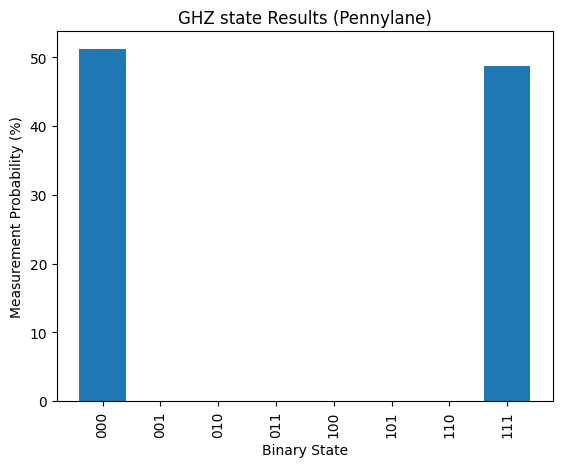

In [4]:
# We can proceed to see how the quantum circuit looks like in Xanadu's PennyLane
selected_framework = 'pennylane' 
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

import matplotlib.pyplot as plt
print("The results of our simulated circuit are: ")
counts = simulate_circuit(qc, selected_framework)
print(counts)

total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

all_states = [format(i, '03b') for i in range(2**3)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (Pennylane)')
plt.xticks(rotation='vertical')  
plt.show()

T  : |0|1|2|
            
q0 : -H-C---
        |   
q1 : ---X-C-
          | 
q2 : -----X-

T  : |0|1|2|
The results of our simulated circuit are: 
{'111': 521, '000': 479}


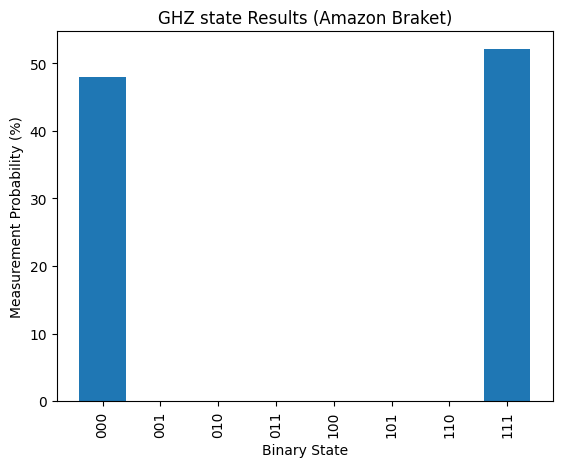

In [5]:
# and finaly Amazon's Braket
selected_framework = 'amazonbraket' 
translated_circuit = translate_to_framework(qc, selected_framework)
translated_circuit.print_circuit()

import matplotlib.pyplot as plt

print("The results of our simulated circuit are: ")
counts = simulate_circuit(qc, selected_framework)
print(counts)

total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

all_states = [format(i, '03b') for i in range(2**3)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('GHZ state Results (Amazon Braket)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()